In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
train = pd.read_csv("optdigits_tra.csv" , header=None)
test = pd.read_csv("optdigits_tes.csv" , header=None)

In [87]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
5,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
6,0,0,1,11,13,11,7,0,0,0,...,0,0,0,1,13,5,0,0,0,5
7,0,0,8,10,8,7,2,0,0,1,...,0,0,0,4,13,8,0,0,0,5
8,0,0,15,2,14,13,2,0,0,0,...,0,0,0,10,12,5,0,0,0,0
9,0,0,3,13,13,2,0,0,0,6,...,0,0,0,3,15,11,6,0,0,8


In [88]:
test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
5,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5
6,0,0,0,12,13,0,0,0,0,0,...,0,0,0,1,9,15,11,3,0,6
7,0,0,7,8,13,16,15,1,0,0,...,0,0,0,13,5,0,0,0,0,7
8,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
9,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9


In [90]:
X = np.array((train.loc[:,:63]))
X = (X - X.min())/(X.max() - X.min())
Y = np.array(train[64])

X_test = np.array(test.loc[:,:63])
X_test = (X_test - X_test.min())/(X_test.max() - X_test.min())
Y_test = np.array(test[64])

nt = []
for i in Y_test:
    op = [0,0,0,0,0,0,0,0,0,0]
    op[i] = 1
    nt.append(op)
Y_test = np.array(nt)


nt = []
for i in Y:
    op = [0,0,0,0,0,0,0,0,0,0]
    op[i] = 1
    nt.append(op)
Y = np.array(nt) 


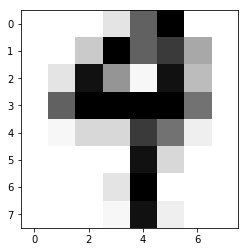

In [91]:
mat=[]
for i in range(len(X)):
    mat.append(X[i].reshape(8,8))

plt.imshow(mat[3], cmap='Greys')

In [92]:
sep1=int(0.2*len(train))
sep2=int(0.4*len(train))
sep3=int(0.6*len(train))
sep4=int(0.8*len(train))

x1_train=X[0:sep1]
x2_train=X[sep1+1:sep2]
x3_train=X[sep2:sep3]
x4_train=X[sep3:sep4]
x5_train=X[sep4:]


y1_train=Y[:sep1]
y2_train=Y[sep1+1:sep2]
y3_train=Y[sep2:sep3]
y4_train=Y[sep3:sep4]
y5_train=Y[sep4:]






In [93]:
# Activation function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [94]:
def feed_forward(data_in, w0,w1,w2, w3, b0,b1,b2,b3):

    layer0 = data_in
    layer1 = tanh(np.dot(layer0, w0)+b0)
    layer2 = tanh(np.dot(layer1, w1)+b1)
    layer3 = tanh(np.dot(layer2, w2)+b2)
    layer4 = tanh(np.dot(layer3, w3)+b3)

    return layer0, layer1, layer2, layer3, layer4

In [95]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3,b0,b1,b2,b3, learning_rate):

    l4_error = layer4 - actual_y
    l4_delta = l4_error * dtanh(layer4)
    dh4 = np.dot(layer3.T, l4_delta)
    
    l3_error = l4_delta.dot(w3.T)
    l3_delta = l3_error * dtanh(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * dtanh(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dtanh(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    
    b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))    
   
    if i%10==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        
        if i%100 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3, b0,b1,b2,b3

In [96]:
def accuracy(testx, testy):
    correct = 0
    layer0, layer1, layer2, layer3, layer4 = feed_forward(testx,w0, w1,w2,w3, b0,b1,b2,b3)
    for i in range(len(testx)):
        if np.argmax(layer4[i]) == np.argmax(testy[i]):
            correct +=1 
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [97]:
w0 = np.random.random((64,53))
w1 = np.random.random((53,33))
w2 = np.random.random((33,25))
w3 = np.random.random((25,10))

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1
b3 = np.random.random((1,1))-1

epochs = 1000

In [98]:
loss_curve = []
iters = []

In [108]:
for i in range(epochs):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(x5_train, w0,w1,w2, w3, b0,b1,b2,b3)
    w0,w1,w2, w3, b0,b1,b2,b3 = backpropogate(i,layer0, layer1, layer2, layer3, layer4, y5_train , w0,w1,w2, w3, b0,b1,b2,b3, 0.001)



 100 0.016701010298

 200 0.0153370726733

 300 0.0143835359311

 400 0.0148487197252

 500 0.0137037409865

 600 0.012281085958

 700 0.011396295597

 800 0.013457714473

 900 0.0106853912107


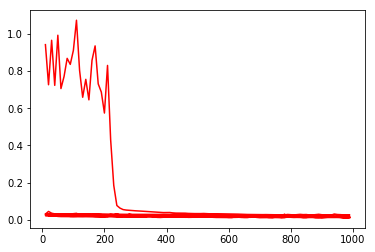

In [109]:
plt.plot(iters, loss_curve,'r')

In [110]:
accuracy(x5_train,y5_train)

'Accuracy: 98.03921568627452%'

In [111]:
accuracy(Xt,Yt)

'Accuracy: 88.48080133555926%'